In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_sets/CO2_emission.csv')

In [3]:
df.head()

,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City,Fuel_Consumption_in_City_Hwy,Fuel_Consumption_comb,CO2_Emissions,Smog_Level
0,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Make                          935 non-null    object 
 1   Model                         935 non-null    object 
 2   Vehicle_Class                 935 non-null    object 
 3   Engine_Size                   935 non-null    float64
 4   Cylinders                     935 non-null    int64  
 5   Transmission                  935 non-null    object 
 6   Fuel_Consumption_in_City      935 non-null    float64
 7   Fuel_Consumption_in_City_Hwy  935 non-null    float64
 8   Fuel_Consumption_comb         935 non-null    float64
 9   CO2_Emissions                 935 non-null    int64  
 10  Smog_Level                    935 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 80.5+ KB


In [5]:
df.describe()

,Engine_Size,Cylinders,Fuel_Consumption_in_City,Fuel_Consumption_in_City_Hwy,Fuel_Consumption_comb,CO2_Emissions,Smog_Level
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [6]:
list(df.columns)

['Make',
 'Model',
 'Vehicle_Class',
 'Engine_Size',
 'Cylinders',
 'Transmission',
 'Fuel_Consumption_in_City',
 'Fuel_Consumption_in_City_Hwy',
 'Fuel_Consumption_comb',
 'CO2_Emissions',
 'Smog_Level']

In [7]:
df = df.drop(columns='Smog_Level')

## Checking for Missing Data

In [8]:
df.isnull().sum()

Make                            0
Model                           0
Vehicle_Class                   0
Engine_Size                     0
Cylinders                       0
Transmission                    0
Fuel_Consumption_in_City        0
Fuel_Consumption_in_City_Hwy    0
Fuel_Consumption_comb           0
CO2_Emissions                   0
dtype: int64

In [9]:
df['Model'].value_counts()

Model
Silverado 4WD                    7
Sierra 4WD                       7
Sierra                           5
Silverado                        5
Mustang                          5
                                ..
Terrain AWD                      1
Yukon (Without Stop-Start)       1
Yukon XL (Without Stop-Start)    1
Accord                           1
XC90 T6 AWD                      1
Name: count, Length: 703, dtype: int64

In [10]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

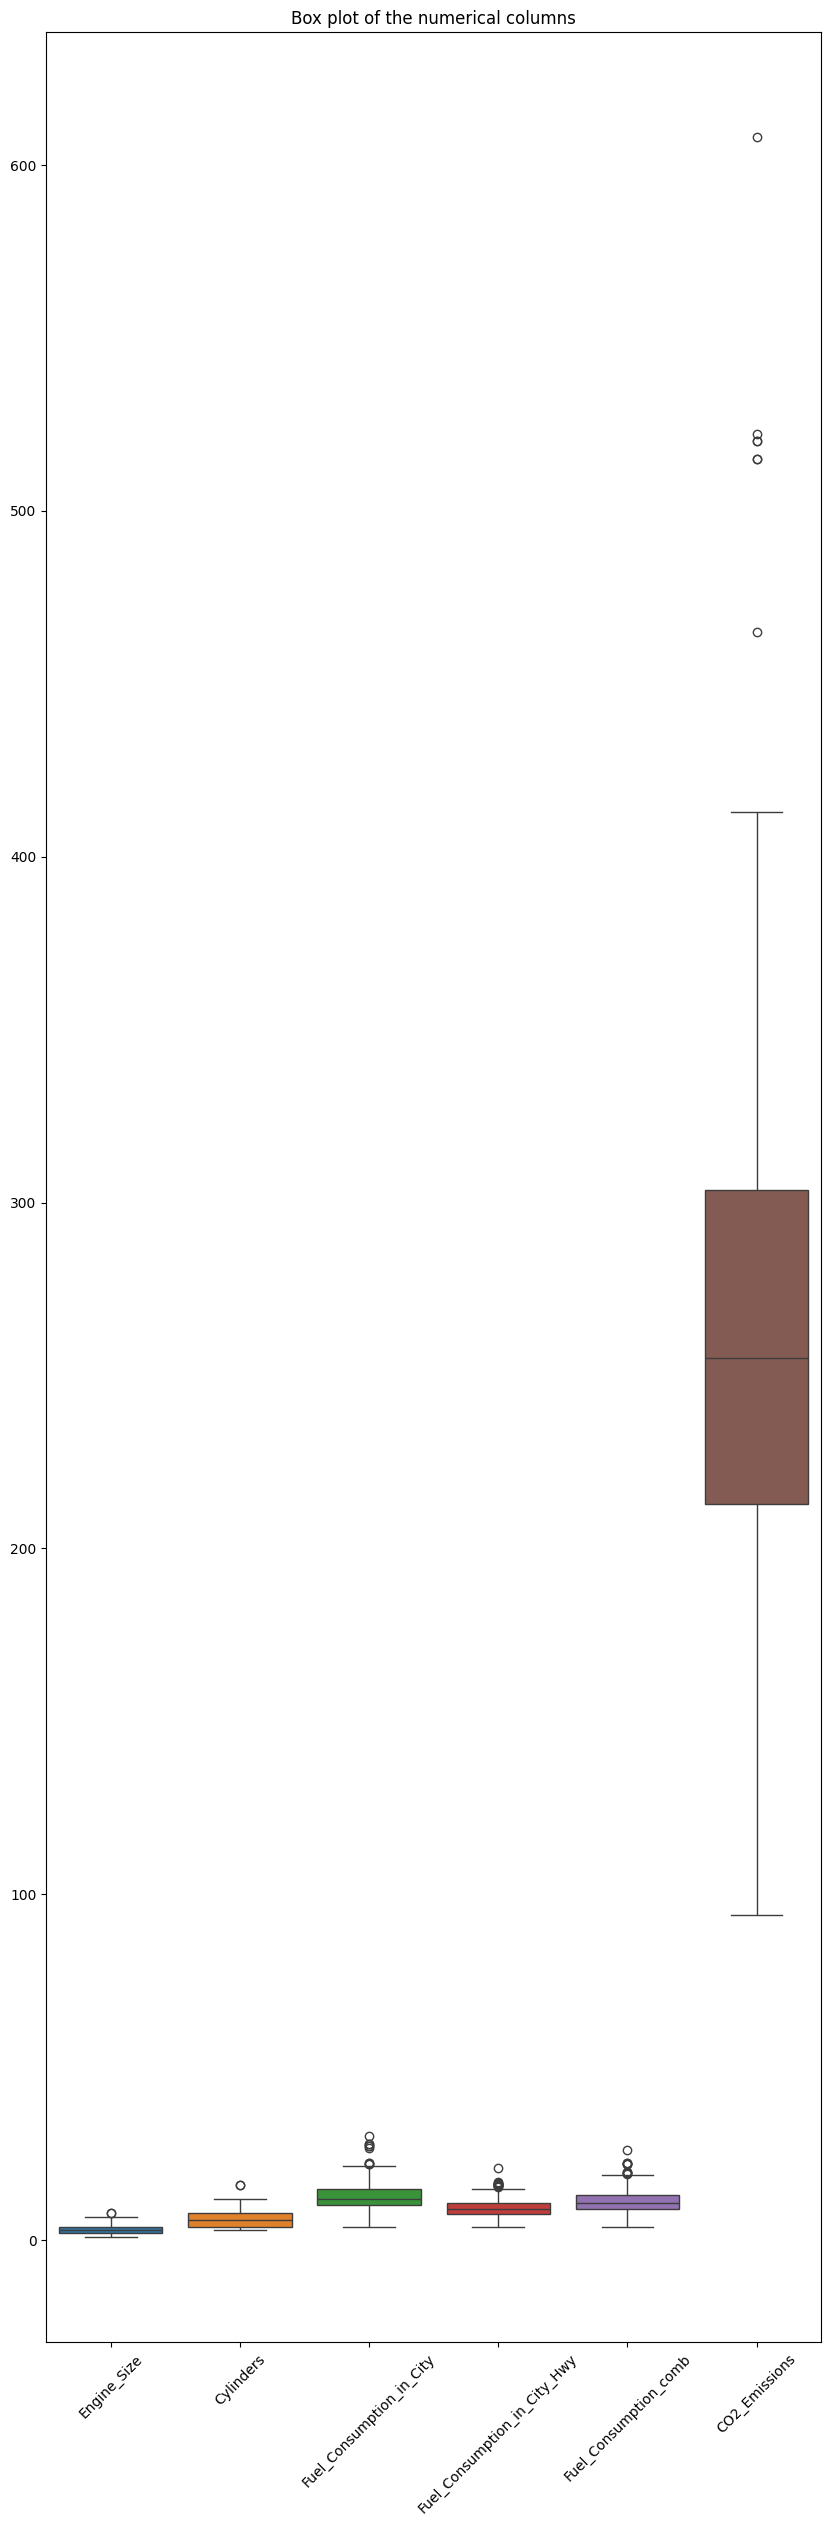

In [11]:
plt.figure(figsize=(10,30))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box plot of the numerical columns')
plt.show()

In [12]:
df[numerical_columns].head()

,Engine_Size,Cylinders,Fuel_Consumption_in_City,Fuel_Consumption_in_City_Hwy,Fuel_Consumption_comb,CO2_Emissions
0,2.4,4,9.9,7.0,8.6,199
1,3.5,6,11.1,10.8,11.0,256
2,2.0,4,11.0,8.6,9.9,232
3,2.0,4,11.3,9.1,10.3,242
4,2.0,4,11.2,8.0,9.8,230


In [13]:
df[categorical_columns].head()

,Make,Model,Vehicle_Class,Transmission
0,Acura,ILX,Compact,AM8
1,Acura,NSX,Two-seater,AM9
2,Acura,RDX SH-AWD,SUV: Small,AS10
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,AS10
4,Acura,TLX SH-AWD,Compact,AS10


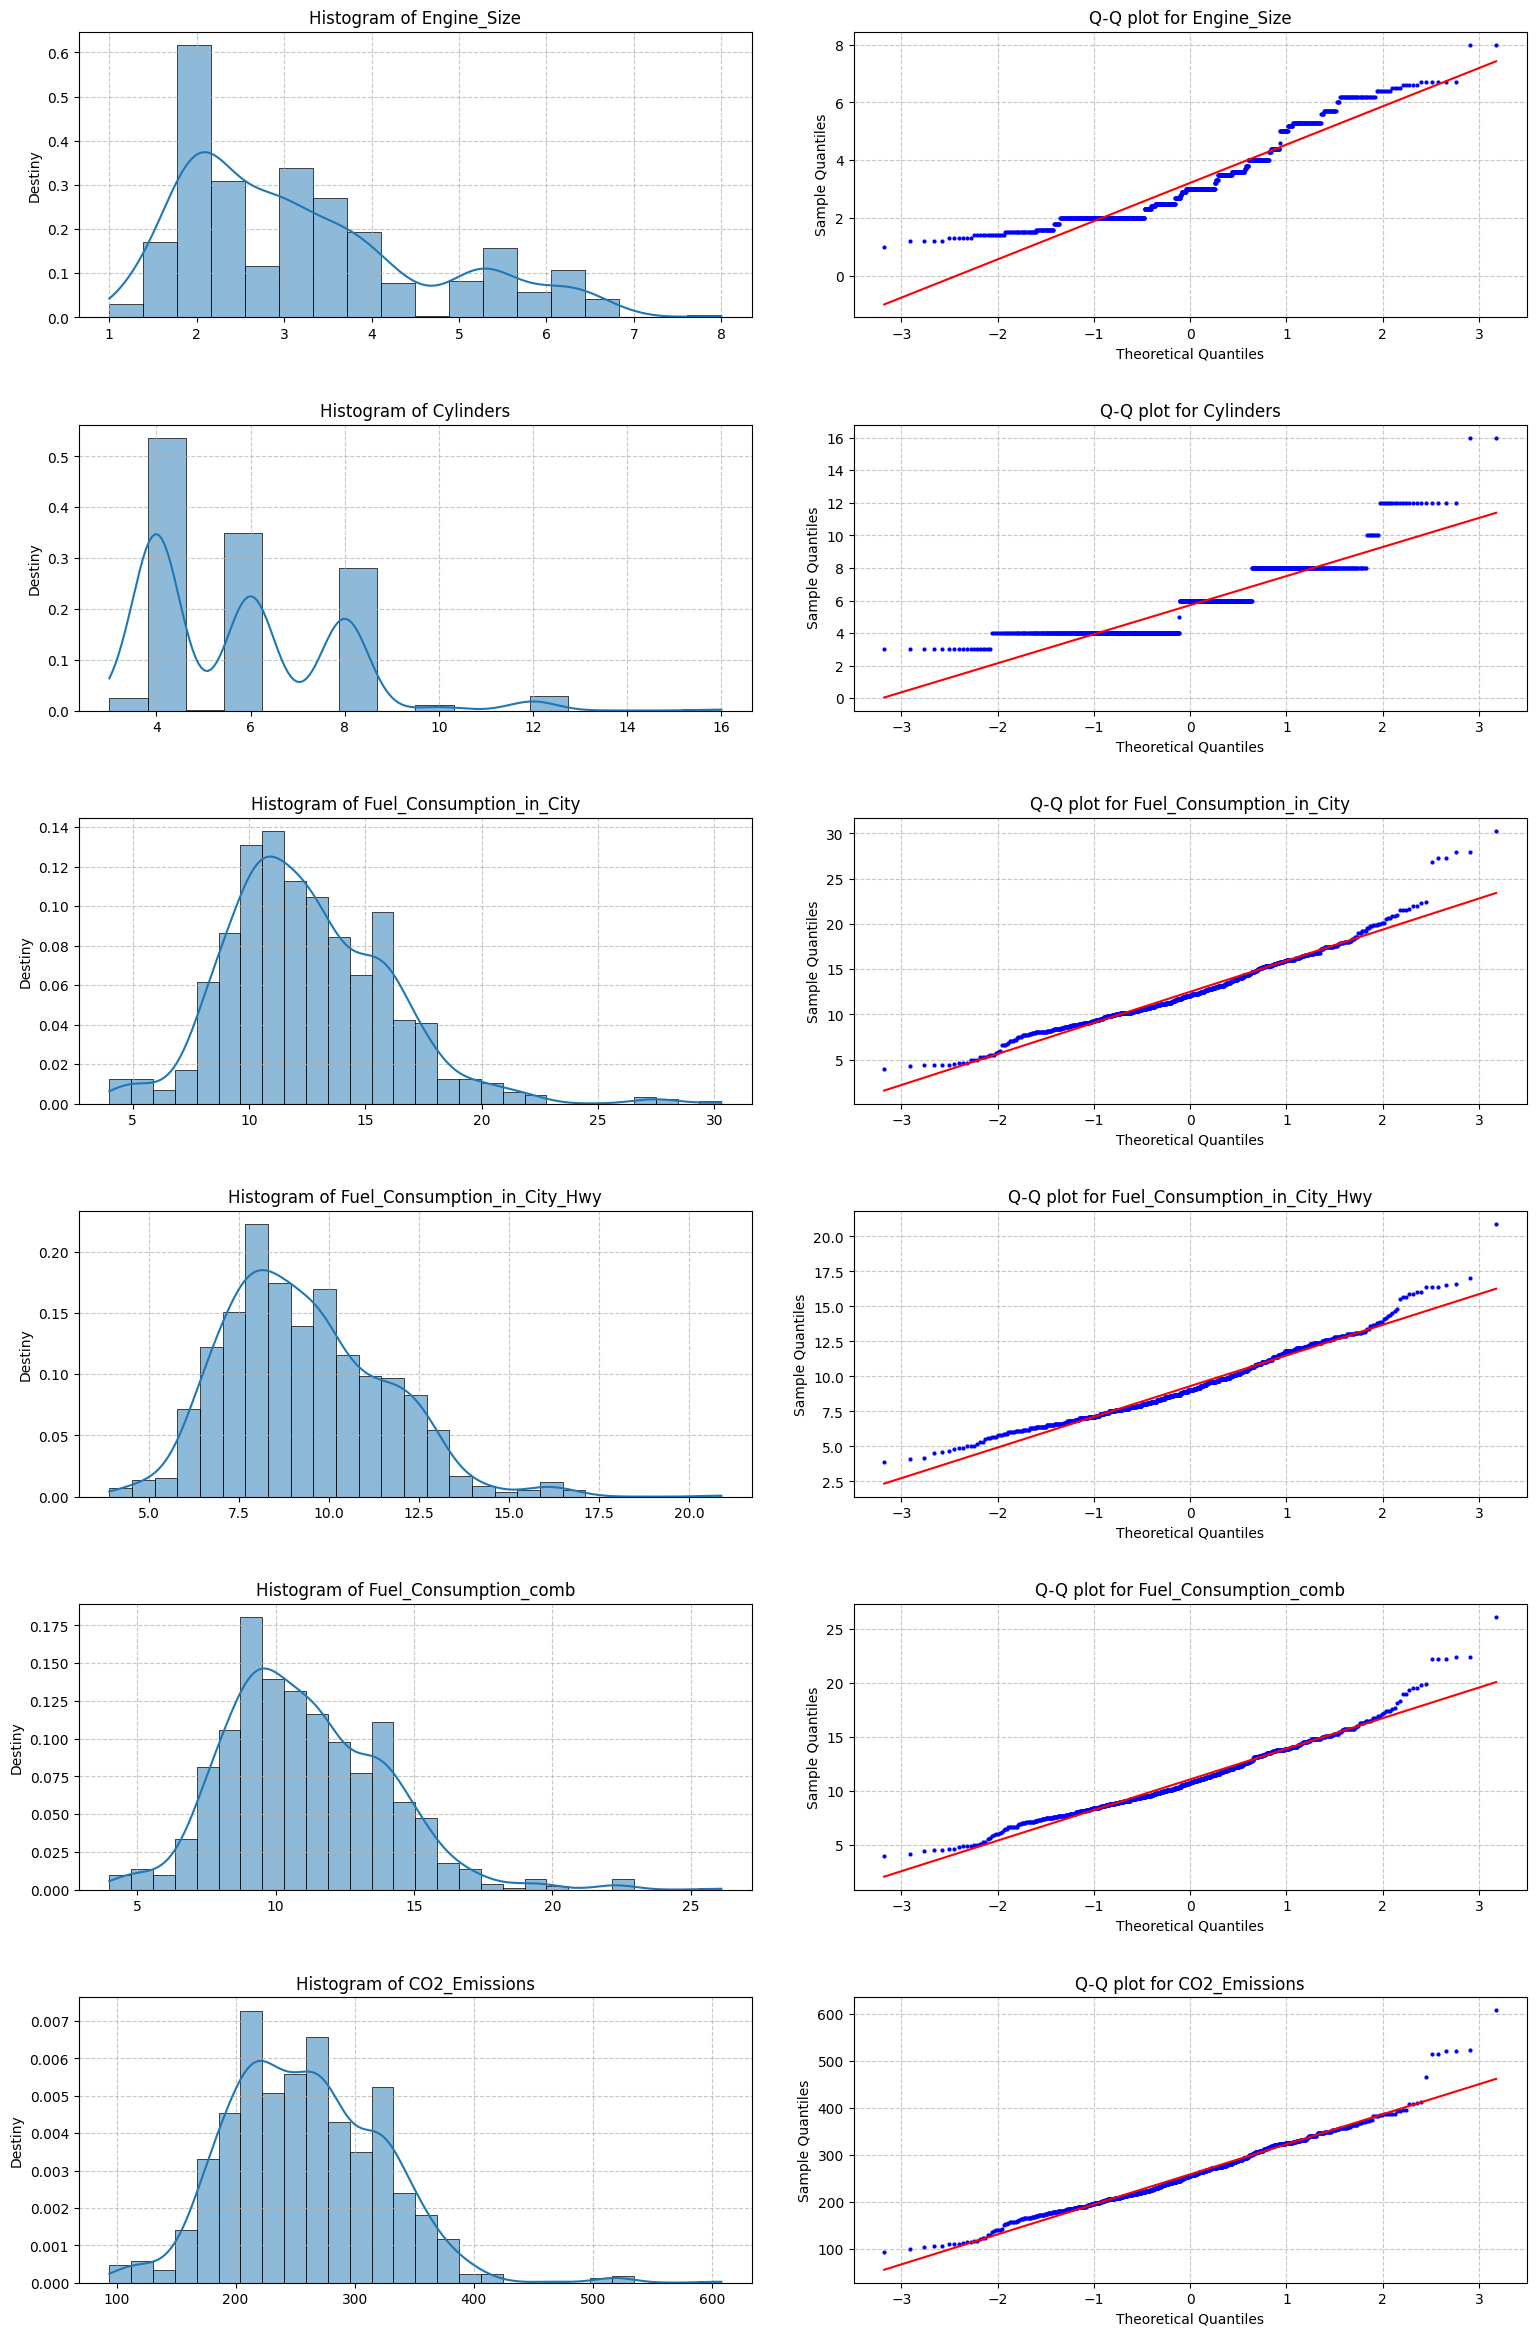

In [14]:
import scipy.stats as stats
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(16, num_cols * 4))
#plotting histogram and Q-Q plots for each numerical column
for i, col in enumerate (numerical_columns):
     #hsitogram on the left subplot
    sns.histplot(df[col], kde=True, ax=axes[i,0], stat='density', linewidth=0.5)
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,0].set_xlabel('')
    axes[i,0].set_ylabel('Destiny')
    axes[i,0].grid(True, linestyle='--',alpha=0.7)

    #Q-Q plot on the right subplot
    stats.probplot(df[col],plot=axes[i,1],dist='norm',fit=True)
    axes[i,1].get_lines()[0].set_markersize(2.0)
    axes[i,1].grid(True, linestyle='--',alpha=0.7)
    axes[i,1].set_title(f'Q-Q plot for {col}')
    axes[i,1].set_xlabel('Theoretical Quantiles')
    axes[i,1].set_ylabel('Sample Quantiles')

#Adjust layout on the right subplot
plt.tight_layout(pad=3.0)
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import anderson, jarque_bera, shapiro, normaltest, kstest
from statsmodels.stats.diagnostic import lilliefors # Corrected import

# Function to perform normality tests
def test_normality (df, col):
    print(f'Column: {col}')
    
#Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro (df[col])
    print(f'Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
    if p_shapiro > 0.05:
        print(f'Shapiro-Wilk Test: {col} looks normally distributed (Normal to reject H0)')
    else:
        print(f'Shapiro-Wilk Test: {col} does not look normally distributed (reject H0)')
        
# Anderson-Darling test
    result_anderson = anderson (df[col])
    print(f'Anderson-Darling Test: Statistics={result_anderson.statistic:.3f}')
    print(f'Anderson-Darling Test: Critical Values: {result_anderson.critical_values}')
    if result_anderson.statistic < result_anderson.critical_values [2]:
        print(f'Anderson-Darling Test: {col} looks normally distributed (Normal to reject H0)')
    else:
        print(f'Anderson-Darling Test: {col} does not look normally distributed (reject H0)')
        
# Jarque-Bera test
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB statistic={jb_stat:.3f}, p-value= {p_val_jb:.3f}')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed (Normal to reject H0)')
    else:
        print(f'Jarque-Bera Test: {col} does not look normally distributed (reject H0)')

# D'Agostino and Pearson's test
    stat_agostino, p_agostino = normaltest(df [col])
    print(f"D'Agostino and Pearson's Test: Statistics={stat_agostino:.3f}, p-value= {p_agostino:.3f}")
    if p_agostino > 0.05:
        print(f"D'Agostino and Pearson's Test: {col} looks normally distributed (Normal to reject H0)")
    else:
        print(f"D'Agostino and Pearson's Test: {col} does not look normally distributed (reject H0)")
    
# Kolmogorov-Smirnov test
    ks_stat, p_ks = kstest (df [col], 'norm')
    print(f'Kolmogorov-Smirnov Test: KS statistic={ks_stat:.3f}, p-value= {p_ks: .3f}')
    if p_ks > 0.05:
        print(f'Kolmogorov-Smirnov Test: {col} looks normally distributed (Normal to reject H0)')
    else:
        print(f"Kolmogorov-Smirnov Test: {col} does not look normally distributed (reject H0)")

# Lilliefors test
    stat_lilliefors, p_lilliefors = lilliefors (df[col])
    print(f'Lilliefors Test: Statistics={stat_lilliefors: .3f}, p-value={p_lilliefors:.3f}')
    if p_lilliefors > 0.05:
        print(f'Lilliefors Test: {col} looks normally distributed (Normal to reject H0)')
    else:
        print(f'Lilliefors Test: {col} does not look normally distributed (reject H0)')
    print('\n')
    
# Perform normality tests for each numerical column
for col in numerical_columns:
    test_normality (df, col)

Column: Engine_Size
Shapiro-Wilk Test: Statistics=0.905, p-value=0.000
Shapiro-Wilk Test: Engine_Size does not look normally distributed (reject H0)
Anderson-Darling Test: Statistics=31.190
Anderson-Darling Test: Critical Values: [0.574 0.653 0.784 0.914 1.087]
Anderson-Darling Test: Engine_Size does not look normally distributed (reject H0)
Jarque-Bera Test: JB statistic=120.044, p-value= 0.000
Jarque-Bera Test: Engine_Size does not look normally distributed (reject H0)
D'Agostino and Pearson's Test: Statistics=92.476, p-value= 0.000
D'Agostino and Pearson's Test: Engine_Size does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test: KS statistic=0.907, p-value=  0.000
Kolmogorov-Smirnov Test: Engine_Size does not look normally distributed (reject H0)
Lilliefors Test: Statistics= 0.163, p-value=0.001
Lilliefors Test: Engine_Size does not look normally distributed (reject H0)


Column: Cylinders
Shapiro-Wilk Test: Statistics=0.811, p-value=0.000
Shapiro-Wilk Test: Cylinder

In [16]:
def find_outliers_iqr(data):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_iqr_mask = find_outliers_iqr(df)
print("Outliers detected using IQR method:")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}: {is_outlier}")

Outliers detected using IQR method:
Make: True
Model: True
Vehicle_Class: True
Engine_Size: True
Cylinders: True
Transmission: True
Fuel_Consumption_in_City: True
Fuel_Consumption_in_City_Hwy: True
Fuel_Consumption_comb: True
CO2_Emissions: True


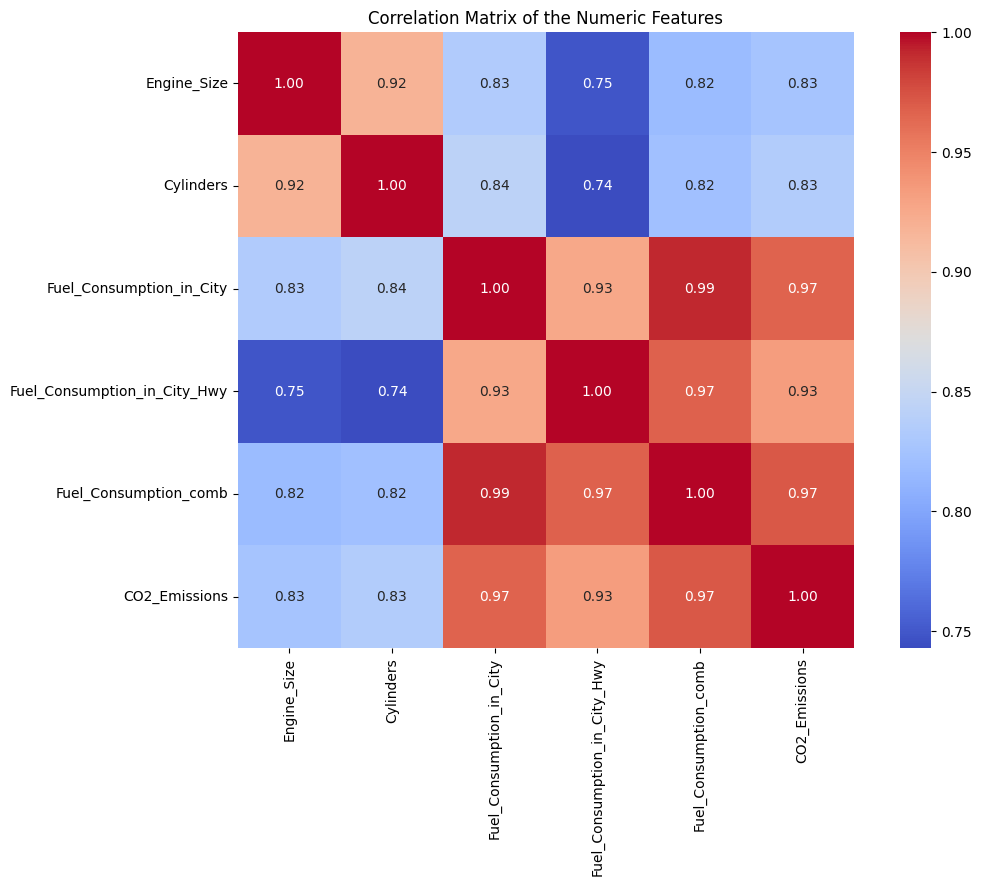

In [17]:
numeric_data = df[numerical_columns]

# compute pairwise correlation of the numeric columns
correlation_matrix = numeric_data.corr()

#plotting correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",square=True)
plt.title('Correlation Matrix of the Numeric Features')
plt.show()

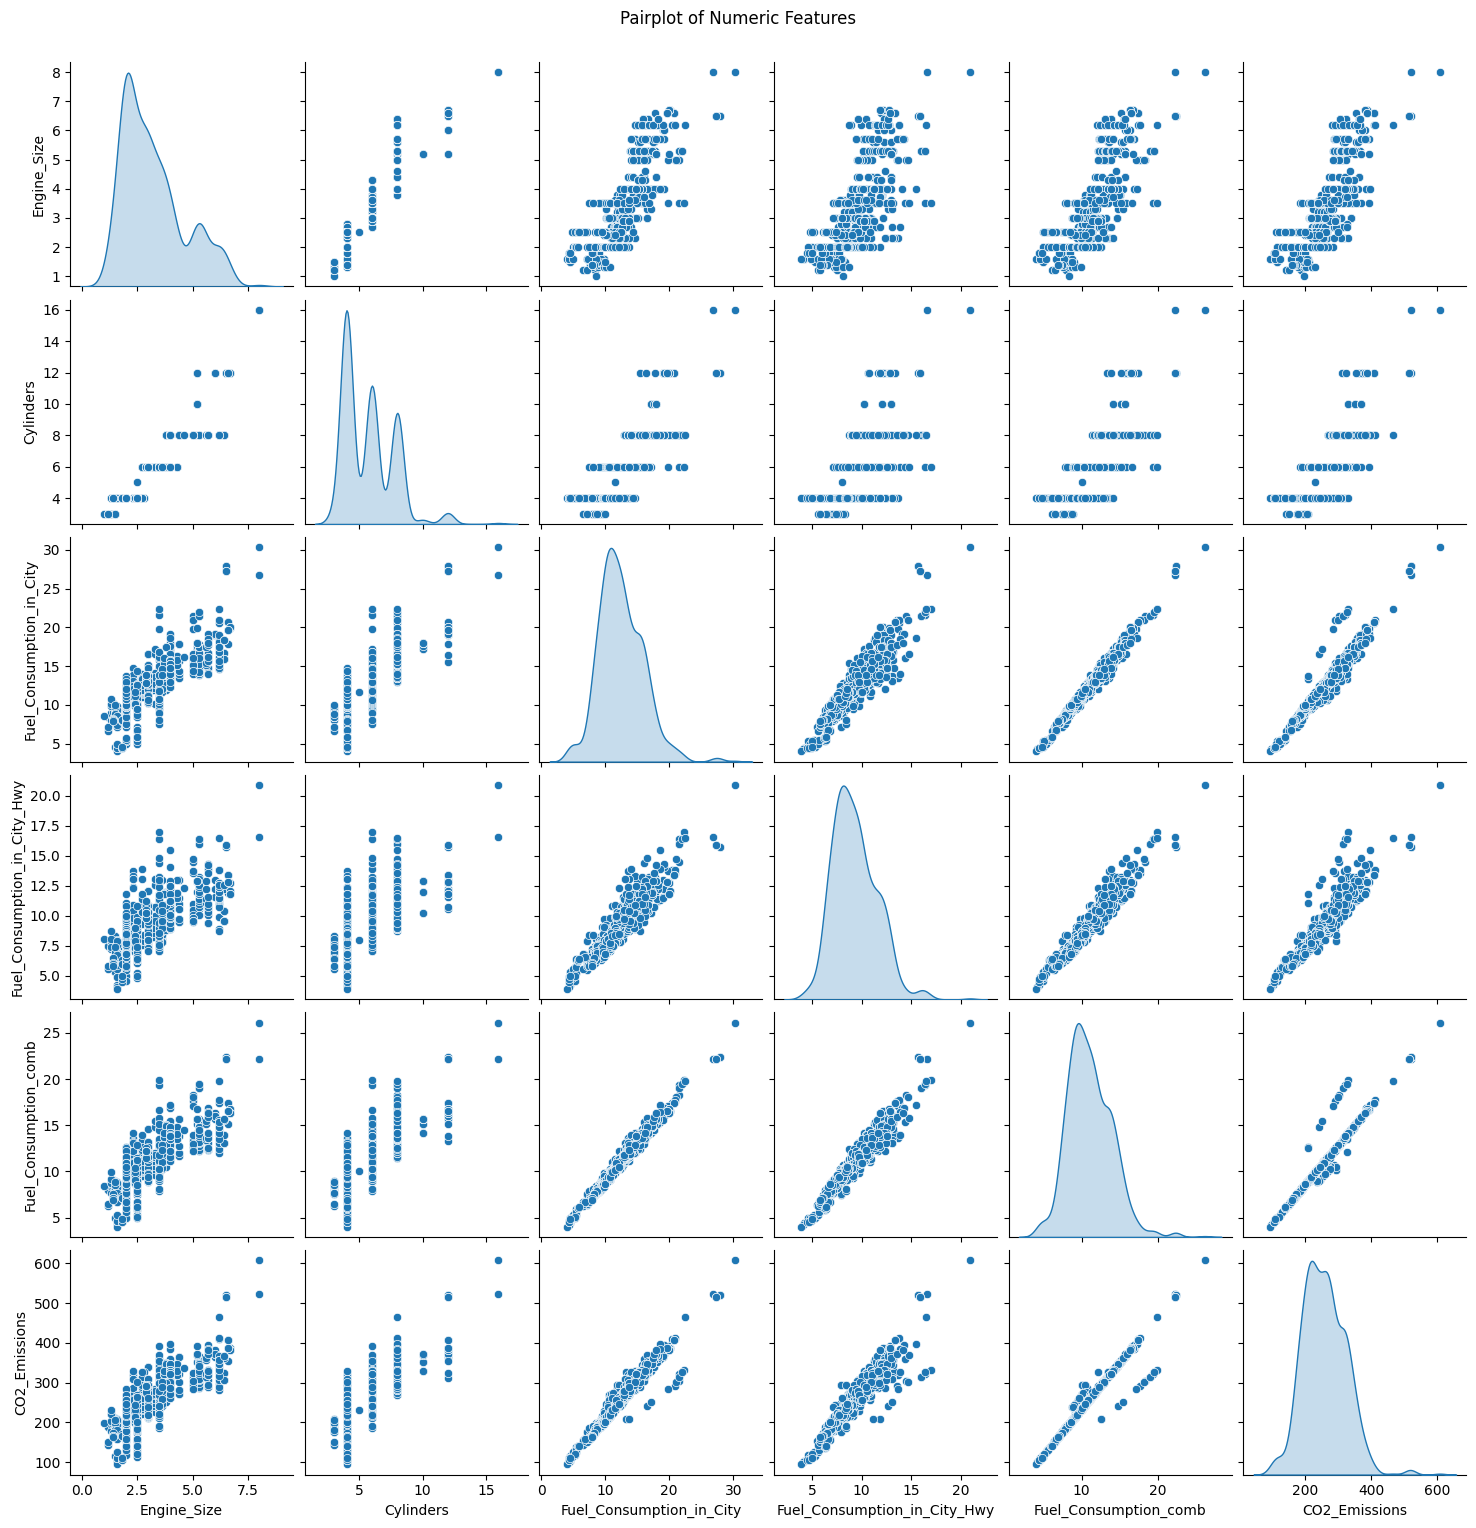

In [18]:
# pairplot of the numeric features
sns.pairplot(df[numerical_columns],diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

In [19]:
df['CO2_Level'] = df['CO2_Emissions'].apply(lambda x: 'high' if x>=255 else 'normal')
df.head()    

,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City,Fuel_Consumption_in_City_Hwy,Fuel_Consumption_comb,CO2_Emissions,CO2_Level
0,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,normal
1,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,high
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,normal
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,normal
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,normal


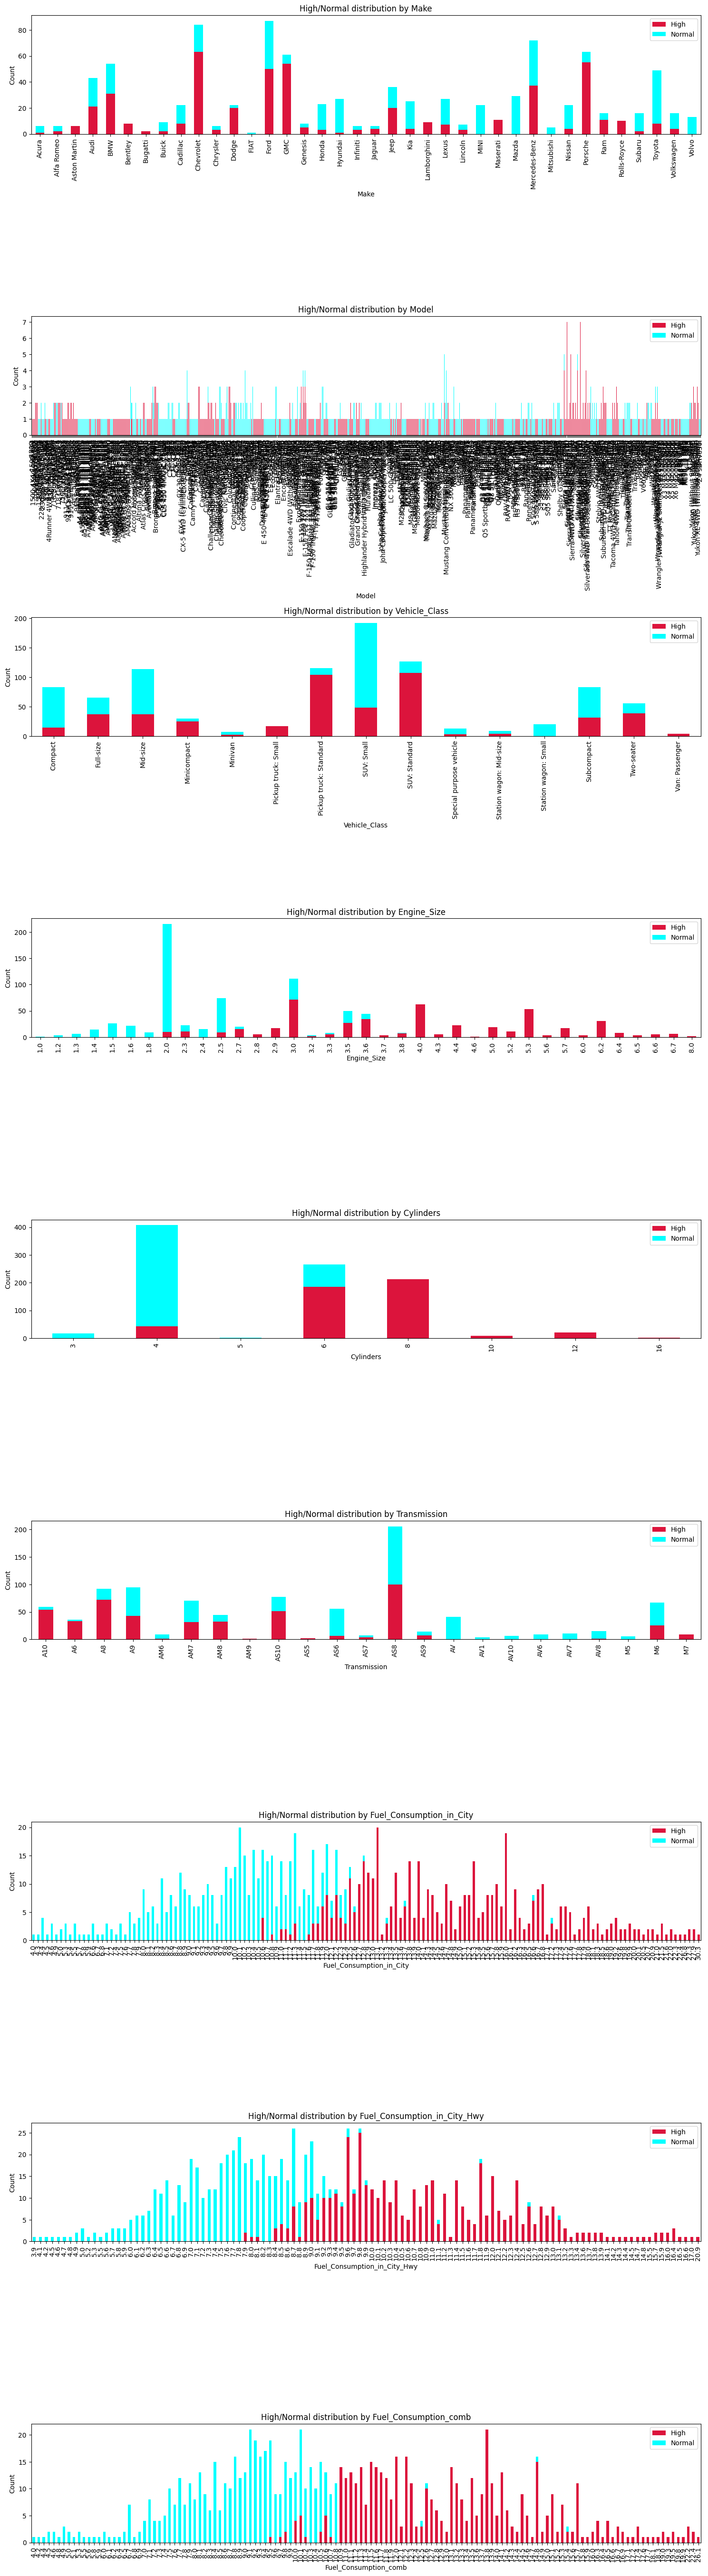

In [20]:
import matplotlib.pyplot as plt
import pandas as pd


columns_to_plot = [col for col in df.columns if col not in ['CO2_Emissions','CO2_Level']]

# Calculate number of rows and columns for subplot grid
num_cols = 1  # Number of columns in subplot layout
num_rows = (len(columns_to_plot) + 1) // num_cols  # Calculate number of rows needed

# Adjust figure size based on number of subplots
fig_width = 15
fig_height = num_rows * 6  # Adjust height based on number of rows

plt.figure(figsize=(fig_width, fig_height))

# Iterate through each column and plot
for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    High_Normal_cross = pd.crosstab(index=df[col], columns=df['CO2_Level'])
    High_Normal_cross.plot(kind='bar', stacked=True, color=['crimson','cyan'], ax=plt.gca(), legend=None)
    plt.title(f'High/Normal distribution by {col}')
    plt.xlabel(col)
    plt.legend(['High','Normal'], loc='upper right')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.tight_layout(pad=3.0)  # Adjust spacing between subplots

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [21]:
# Iterate through each column
for column in df.columns:
    #Get unique values in the column
    unique_values = df[column].unique()

    #Print the column name and its unique values
    print(f"Unique values in {column} column:")
    print()

    # List to store formatted values
    formatted_values = []
    
    # Format and accumulate each unique value to two decimal places if it's a float
    for value in unique_values:
        if isinstance(value, (float, int)):  # Check if the value is numeric
            formatted_values.append(f"{value:.2f}")  # Format numeric values to two decimal places
        else:
            formatted_values.append(str(value))  # Convert non-numeric values to string and add to list
    
    # Print all formatted values in a single line
    print("', '".join(formatted_values))
    print()

Unique values in Make column:

Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Lexus', 'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'Subaru', 'Toyota', 'Volkswagen', 'Volvo

Unique values in Model column:

ILX', 'NSX', 'RDX SH-AWD', 'RDX SH-AWD A-SPEC', 'TLX SH-AWD', 'TLX SH-AWD A-SPEC', 'Giulia', 'Giulia AWD', 'Giulia Quadrifoglio', 'Stelvio', 'Stelvio AWD', 'Stelvio AWD Quadrifoglio', 'DB11 V8', 'DB11 AMR', 'DBS Superleggera', 'DBX V8', 'Vantage V8', 'A4 allroad 45 TFSI quattro', 'A4 Sedan 40 TFSI quattro', 'A4 Sedan 45 TFSI quattro', 'A5 Cabriolet 45 TFSI quattro', 'A5 Coupe 45 TFSI quattro', 'A5 Sportback 45 TFSI quattro', 'A6 allroad 55 TFSI quattro', 'A6 Sedan 45 TFSI quattro', 'A6 Sedan 55 TFSI quattro', 'A7 Sportback 55 TFSI

In [22]:
df.to_csv('Data_sets/filtered_data.csv', index=False)

In [23]:
data = pd.read_csv('Data_sets/filtered_data.csv')

In [24]:
# display the first few rows and all columns
pd.set_option('display.max_columns', None)
print("First few rows of the data: ")
print(data.head())

First few rows of the data: 
    Make              Model Vehicle_Class  Engine_Size  Cylinders  \
0  Acura                ILX       Compact          2.4          4   
1  Acura                NSX    Two-seater          3.5          6   
2  Acura         RDX SH-AWD    SUV: Small          2.0          4   
3  Acura  RDX SH-AWD A-SPEC    SUV: Small          2.0          4   
4  Acura         TLX SH-AWD       Compact          2.0          4   

  Transmission  Fuel_Consumption_in_City  Fuel_Consumption_in_City_Hwy  \
0          AM8                       9.9                           7.0   
1          AM9                      11.1                          10.8   
2         AS10                      11.0                           8.6   
3         AS10                      11.3                           9.1   
4         AS10                      11.2                           8.0   

   Fuel_Consumption_comb  CO2_Emissions CO2_Level  
0                    8.6            199    normal  
1      

In [25]:
data.drop(columns=['Make','Model','CO2_Emissions'],axis = 1,inplace=True)
data.head()

,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City,Fuel_Consumption_in_City_Hwy,Fuel_Consumption_comb,CO2_Level
0,Compact,2.4,4,AM8,9.9,7.0,8.6,normal
1,Two-seater,3.5,6,AM9,11.1,10.8,11.0,high
2,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,normal
3,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,normal
4,Compact,2.0,4,AS10,11.2,8.0,9.8,normal


In [26]:
numerical_cols=data.select_dtypes(exclude=['category','object']).columns
category_cols=data.select_dtypes(include=['category','object']).columns

In [27]:
category_cols

Index(['Vehicle_Class', 'Transmission', 'CO2_Level'], dtype='object')

In [28]:
# Drop numerical columns from data
data_categorical = data.drop(columns=numerical_cols)

# Perform one-hot encoding on categorical columns
encoded_data = pd.get_dummies(data_categorical, columns=['Vehicle_Class', 'Transmission'])

encoded_data.head()

,CO2_Level,Vehicle_Class_Compact,Vehicle_Class_Full-size,Vehicle_Class_Mid-size,Vehicle_Class_Minicompact,Vehicle_Class_Minivan,Vehicle_Class_Pickup truck: Small,Vehicle_Class_Pickup truck: Standard,Vehicle_Class_SUV: Small,Vehicle_Class_SUV: Standard,Vehicle_Class_Special purpose vehicle,Vehicle_Class_Station wagon: Mid-size,Vehicle_Class_Station wagon: Small,Vehicle_Class_Subcompact,Vehicle_Class_Two-seater,Vehicle_Class_Van: Passenger,Transmission_A10,Transmission_A6,Transmission_A8,Transmission_A9,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV1,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
0,normal,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,high,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,normal,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,normal,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,normal,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#numerical_pipeline = Pipeline([
#    ('scaler', StandardScaler())
#])
#numerical_data = numerical_pipeline.fit_transform(data[numerical_cols])

#numerical_data_df = pd.DataFrame(numerical_data, columns=numerical_cols)

#final_data = pd.concat([encoded_data, numerical_data_df], axis=1)
final_data = pd.concat([encoded_data, data[numerical_cols]], axis=1)

final_data.head()

,CO2_Level,Vehicle_Class_Compact,Vehicle_Class_Full-size,Vehicle_Class_Mid-size,Vehicle_Class_Minicompact,Vehicle_Class_Minivan,Vehicle_Class_Pickup truck: Small,Vehicle_Class_Pickup truck: Standard,Vehicle_Class_SUV: Small,Vehicle_Class_SUV: Standard,Vehicle_Class_Special purpose vehicle,Vehicle_Class_Station wagon: Mid-size,Vehicle_Class_Station wagon: Small,Vehicle_Class_Subcompact,Vehicle_Class_Two-seater,Vehicle_Class_Van: Passenger,Transmission_A10,Transmission_A6,Transmission_A8,Transmission_A9,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV1,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Engine_Size,Cylinders,Fuel_Consumption_in_City,Fuel_Consumption_in_City_Hwy,Fuel_Consumption_comb
0,normal,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.4,4,9.9,7.0,8.6
1,high,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3.5,6,11.1,10.8,11.0
2,normal,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,4,11.0,8.6,9.9
3,normal,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,4,11.3,9.1,10.3
4,normal,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,4,11.2,8.0,9.8


In [30]:
final_data.describe()

,Engine_Size,Cylinders,Fuel_Consumption_in_City,Fuel_Consumption_in_City_Hwy,Fuel_Consumption_comb
count,935.000000,935.000000,935.000000,935.000000,935.000000
mean,3.214866,5.716578,12.498610,9.306203,11.060214
std,1.388513,1.977359,3.487271,2.215819,2.867028
min,1.000000,3.000000,4.000000,3.900000,4.000000
25%,2.000000,4.000000,10.100000,7.700000,9.100000
50%,3.000000,6.000000,12.000000,9.000000,10.700000
75%,4.000000,8.000000,14.800000,10.800000,13.100000
max,8.000000,16.000000,30.300000,20.900000,26.100000


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model



#Extract features (X) and target variable(Y)
X=final_data.drop('CO2_Level',axis=1)
y=final_data['CO2_Level']

#Convert target variable to numerical(0 and 1)
y=y.map({'normal':0,'high':1})

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [33]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')


Training Accuracy: 1.00
Testing Accuracy: 0.98


Confusion Matrix:
[[97  4]
 [ 0 86]]


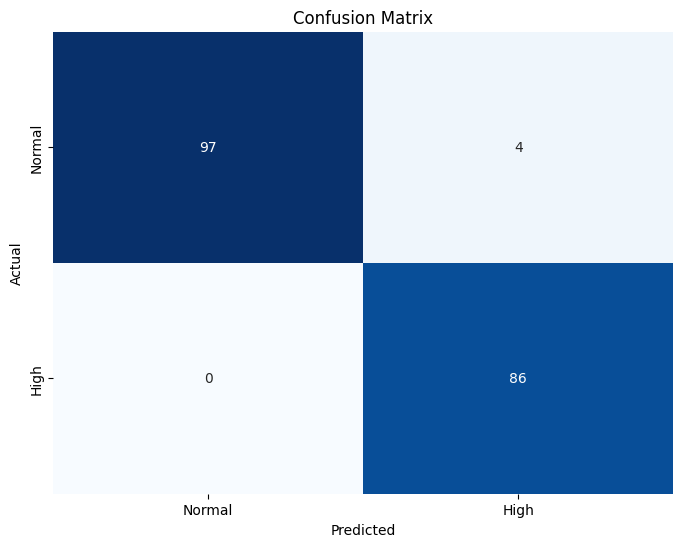

In [34]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'High'], yticklabels=['Normal', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


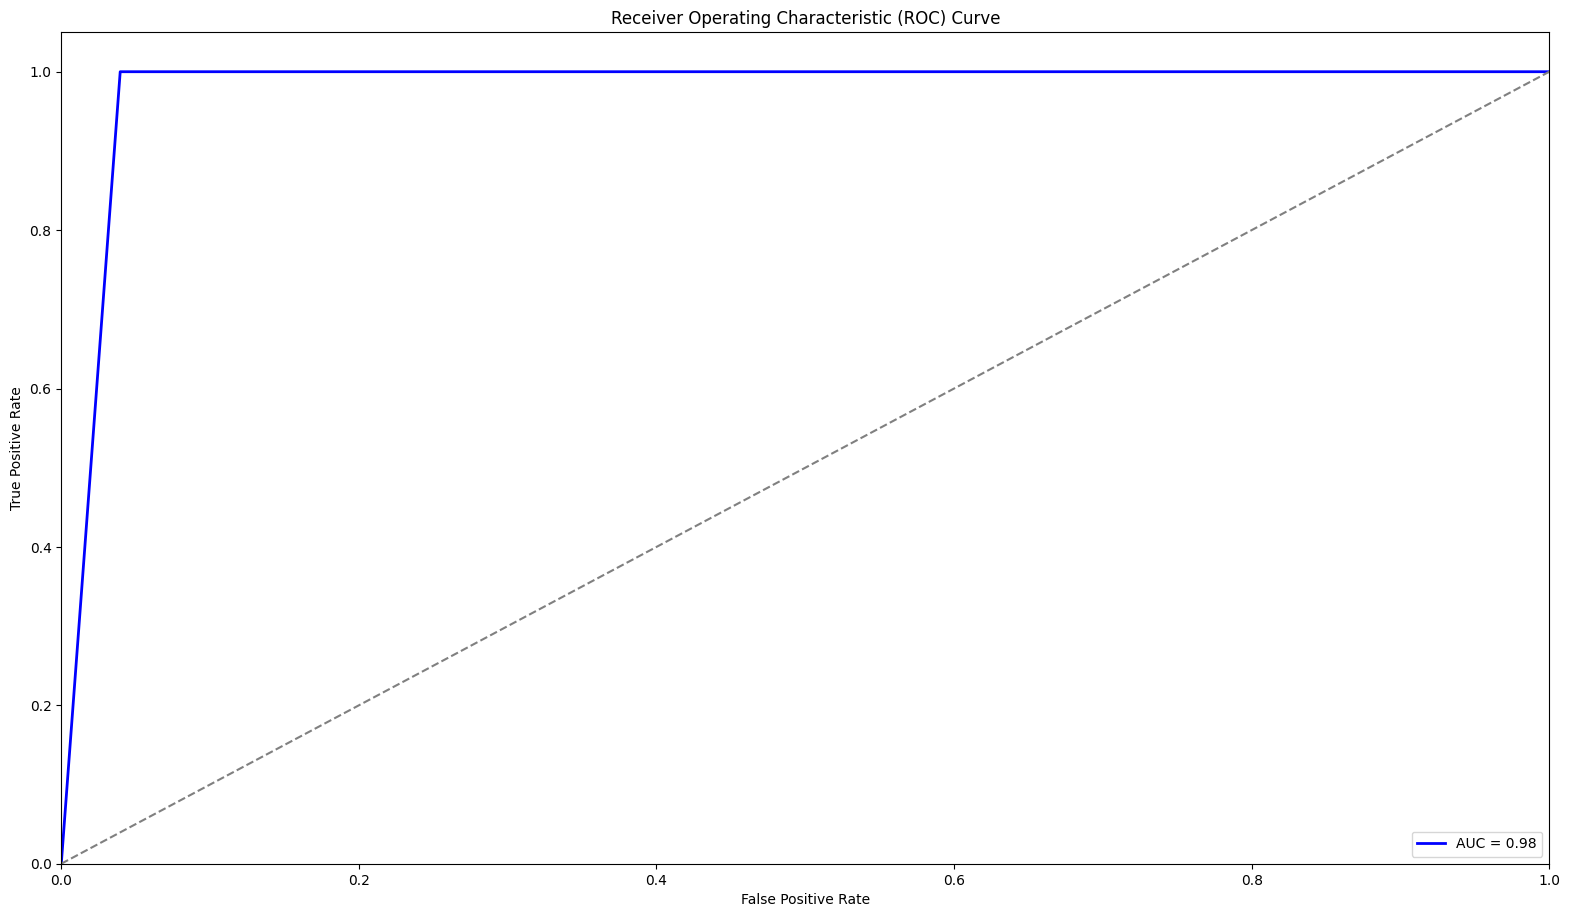

Model saved at ML_MODEL/decision_tree_model.pkl


In [35]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(19.2, 10.8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/decision_tree_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')


Training Accuracy: 1.00
Testing Accuracy: 0.98
Confusion Matrix:
[[98  3]
 [ 1 85]]


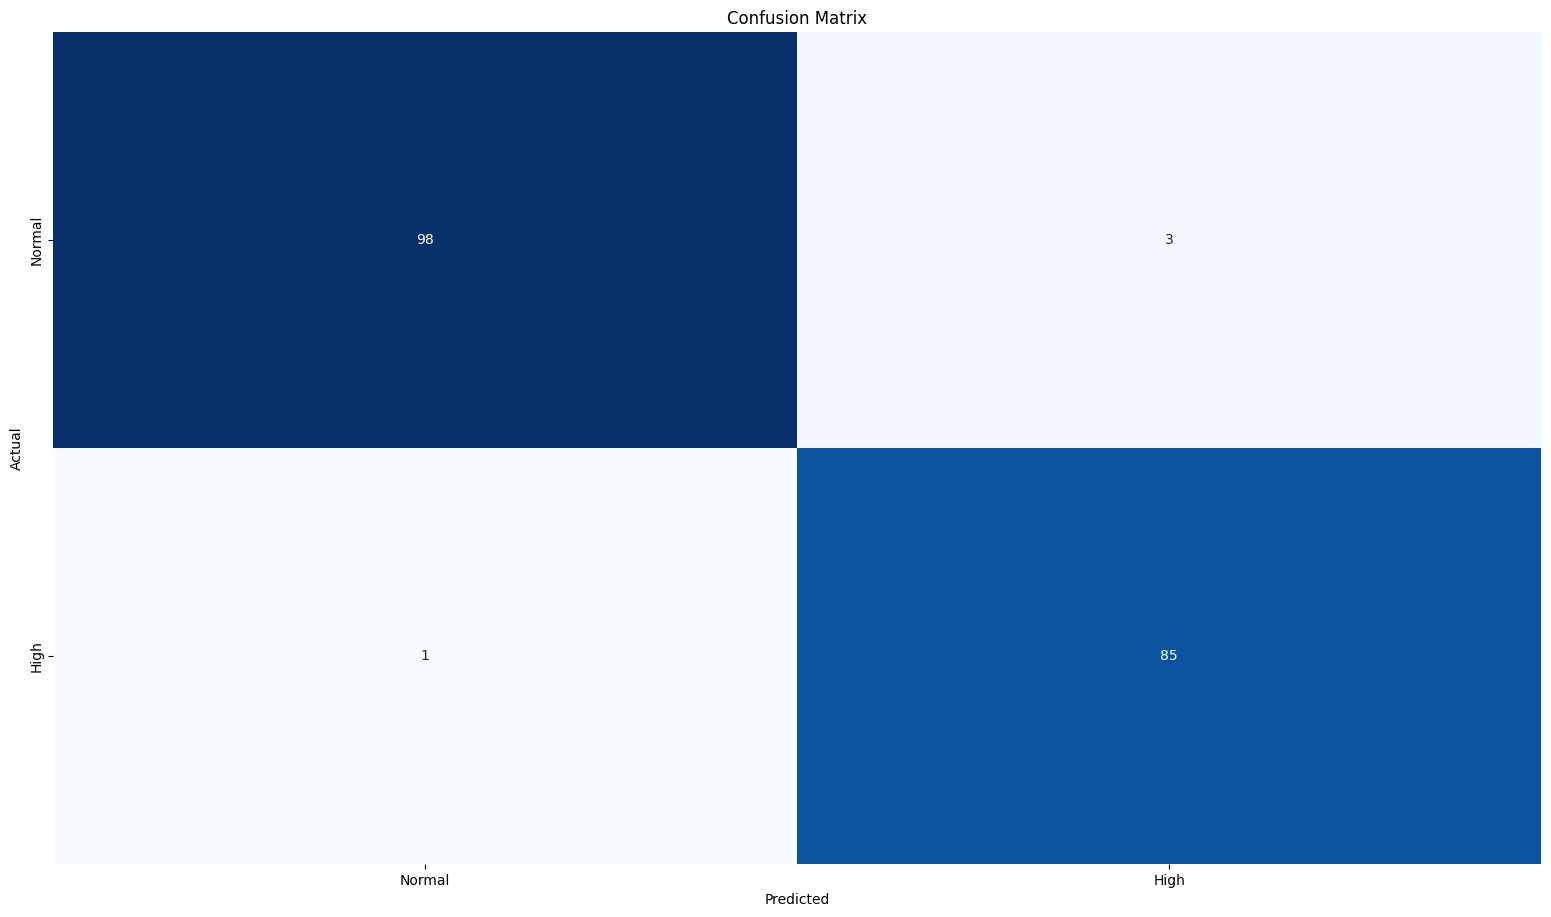

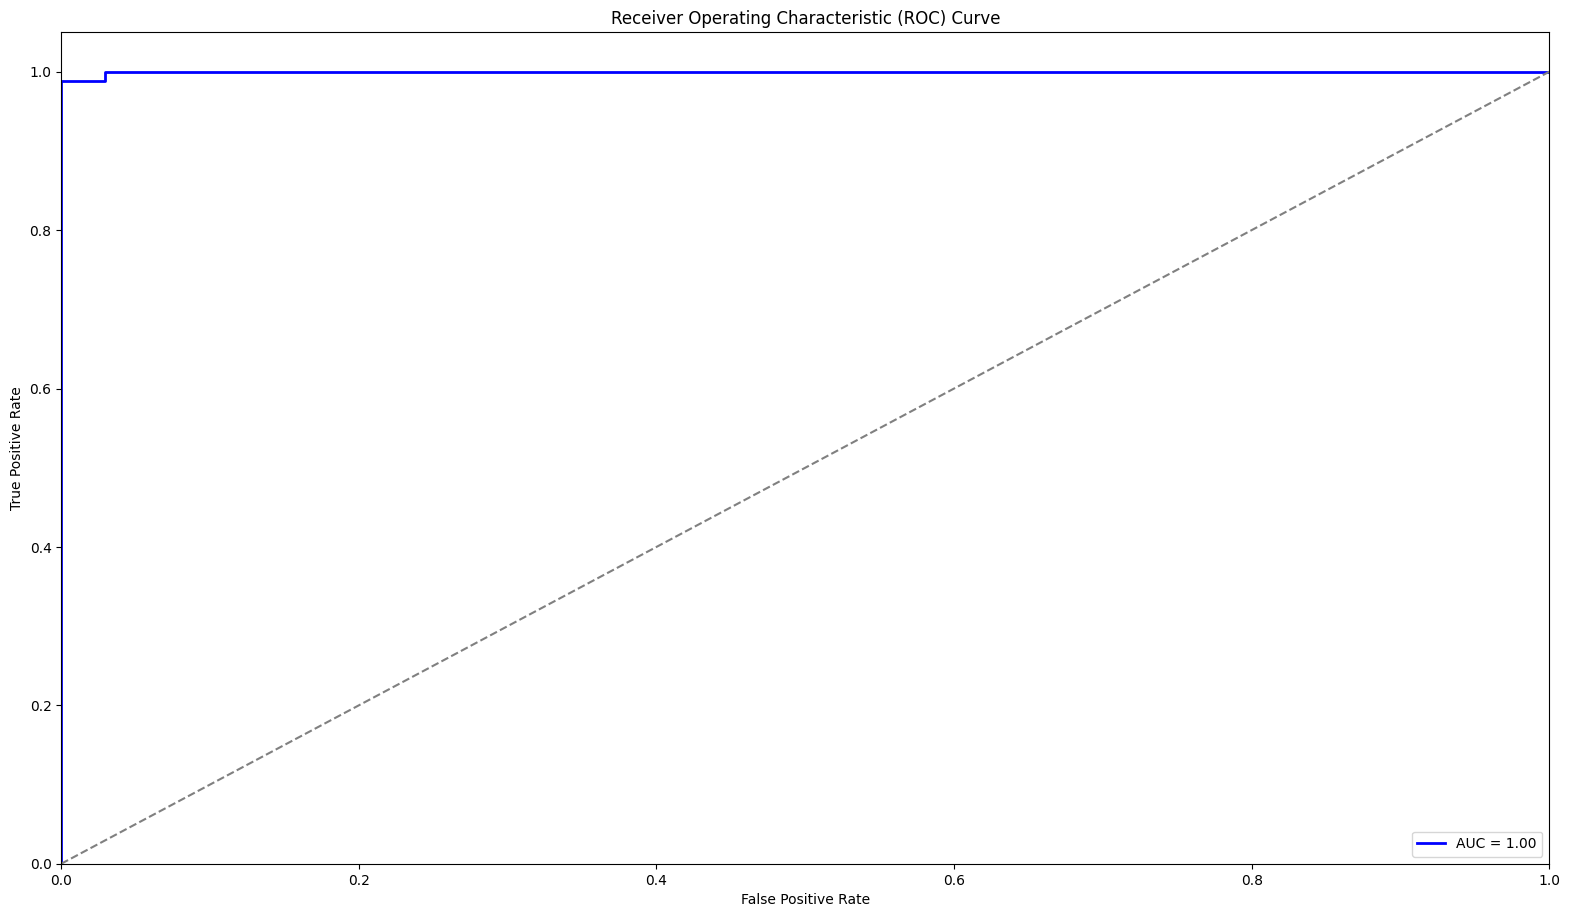

Model saved at ML_MODEL/random_forest_model.pkl


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model






# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)




# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(19.2, 10.8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'High'], yticklabels=['Normal', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(19.2, 10.8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/random_forest_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Training Accuracy: 0.98
Testing Accuracy: 0.95
Confusion Matrix:
[[95  6]
 [ 3 83]]


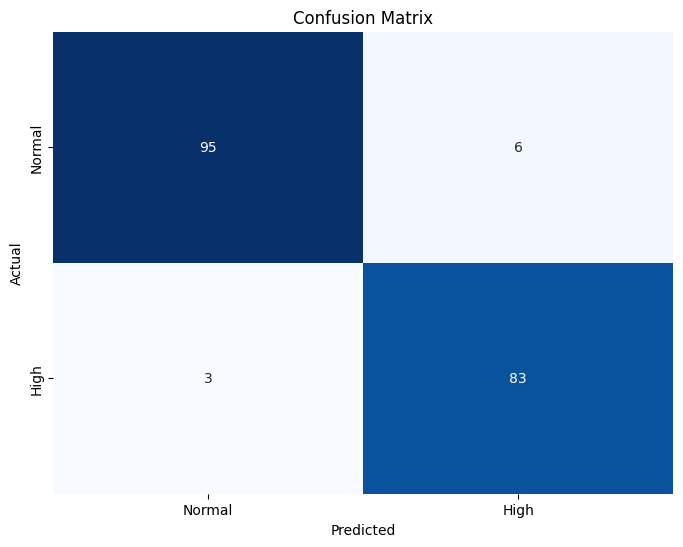

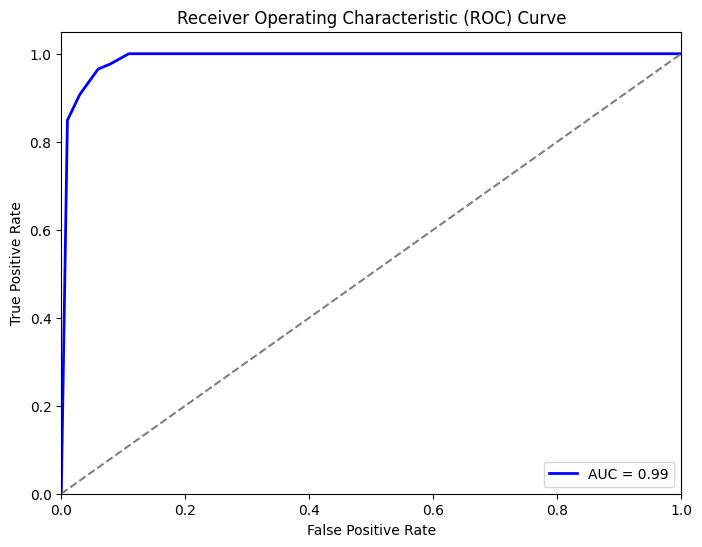

Model saved at ML_MODEL/knn_model.pkl


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model





# Initialize KNN classifier
model = KNeighborsClassifier()

# Fit the model
model.fit(X_train, y_train)





# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'High'], yticklabels=['Normal', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/knn_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

